RAINFALL PREDICTION MODEL

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount("/content/drive")
dataset= pd.read_csv("/content/drive/My Drive/Colab Notebooks/rainfall.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EXPLORATORY DATA ANALYSIS

In [ ]:
dataset.shape

(145460, 23)

In [ ]:
dataset.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
unique_counts = dataset.nunique()
print(unique_counts)

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64


In [ ]:
dataset["RainTomorrow"].describe()

count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [ ]:
dataset["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
X=dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
y=dataset.iloc[:,-1].values
print(len(y))

145460


In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
y=imputer.fit_transform(y.reshape(-1,1))

In [ ]:
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [ ]:
pd.DataFrame(y).isnull().sum()

0    0
dtype: int64

In [ ]:
label1=LabelEncoder()
X[:,0]=label1.fit_transform(X[:,0])
label2=LabelEncoder()
X[:,4]=label2.fit_transform(X[:,4])
label3=LabelEncoder()
X[:,6]=label3.fit_transform(X[:,6])
label4=LabelEncoder()
X[:,7]=label4.fit_transform(X[:,7])
label5=LabelEncoder()
X[:,-1]=label5.fit_transform(X[:,-1])
label6=LabelEncoder()
y=label6.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dataset=pd.DataFrame(X,columns=["Location","MinTemp","MaxTemp","Rainfall","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3am","Humidity9am","Humidity3am","Pressure9am","Pressure3am","Cloud9am","Cloud3am","Temp9am","Temp3am","RainToday"])
dataset["RainTomorrow"]=y
dataset

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3am,Humidity9am,Humidity3am,Pressure9am,Pressure3am,Cloud9am,Cloud3am,Temp9am,Temp3am,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
145458,41,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


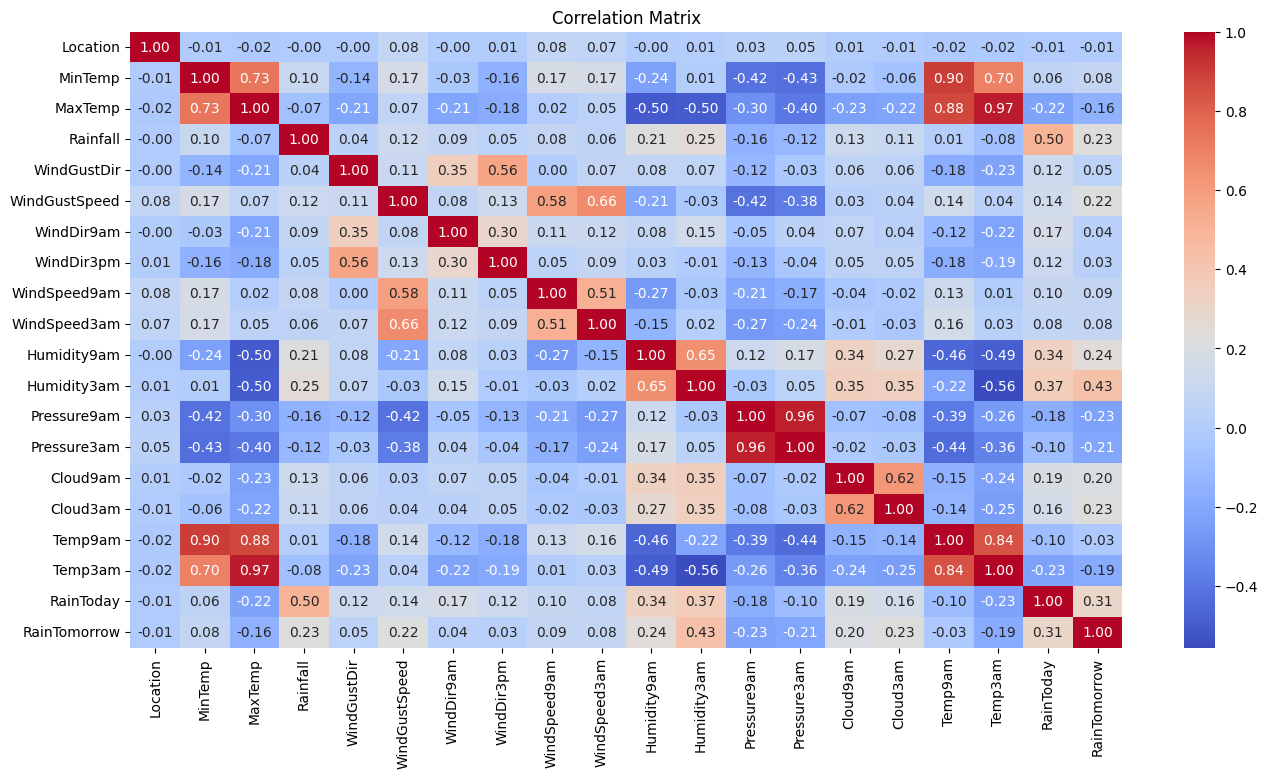

In [ ]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

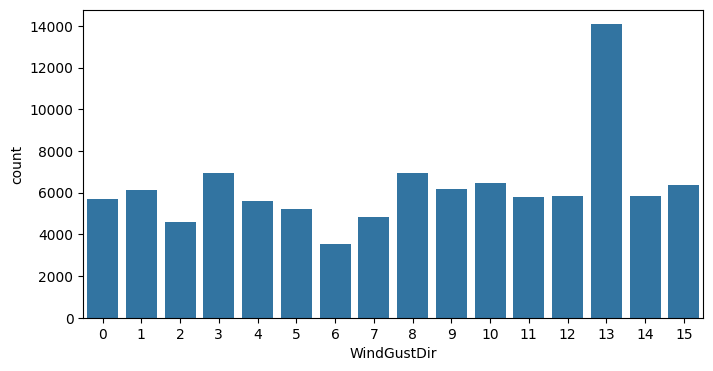

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x="WindGustDir", data=dataset)
plt.show()

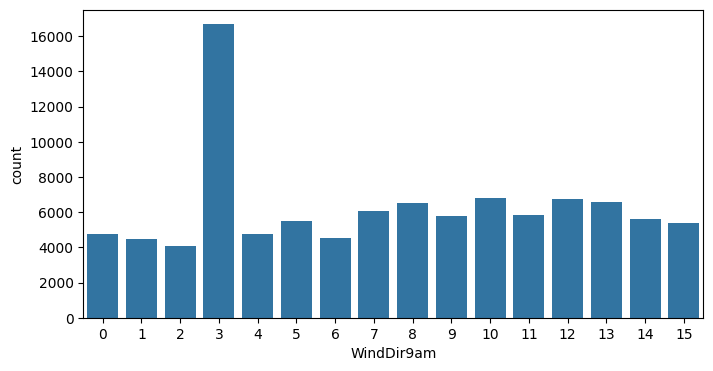

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="WindDir9am", data=dataset)
plt.show()

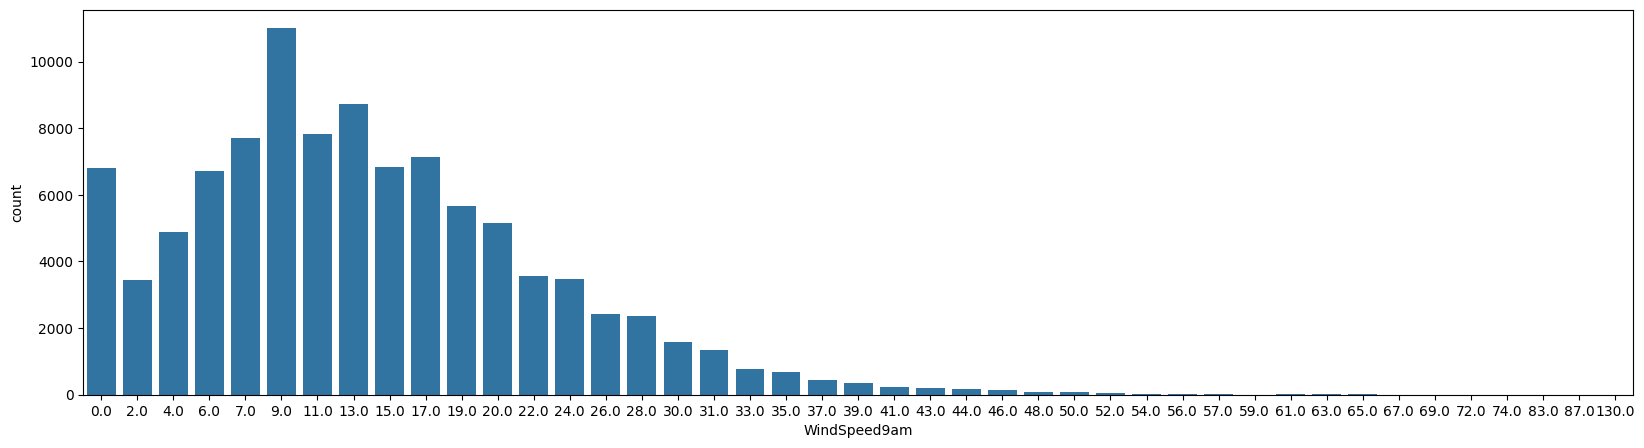

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="WindSpeed9am", data=dataset)
plt.show()

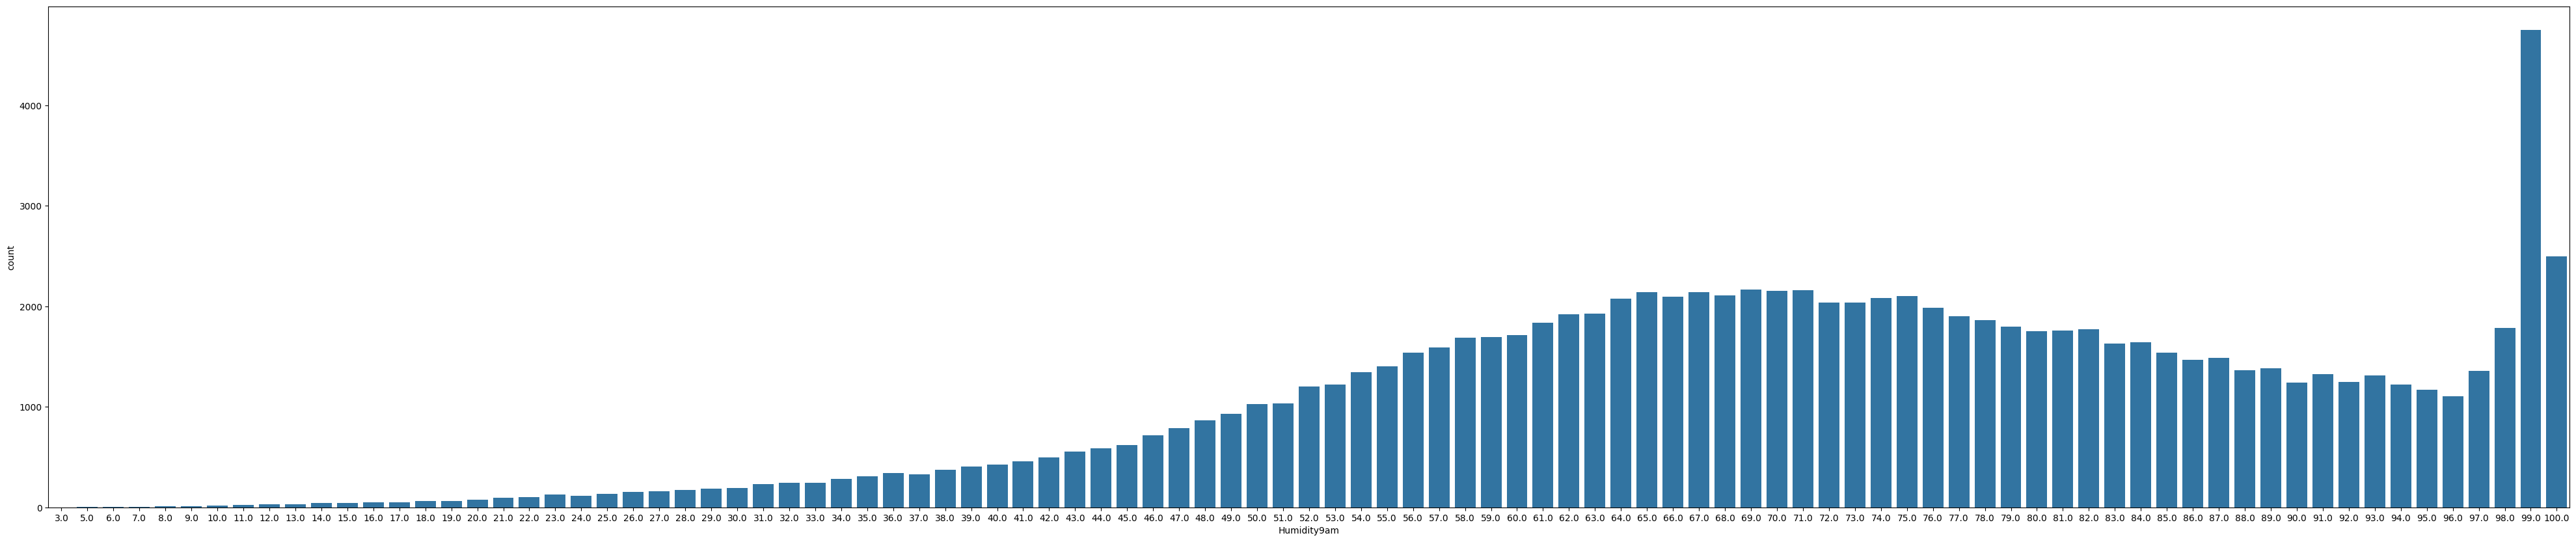

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(x="Humidity9am", data=dataset)
plt.show()

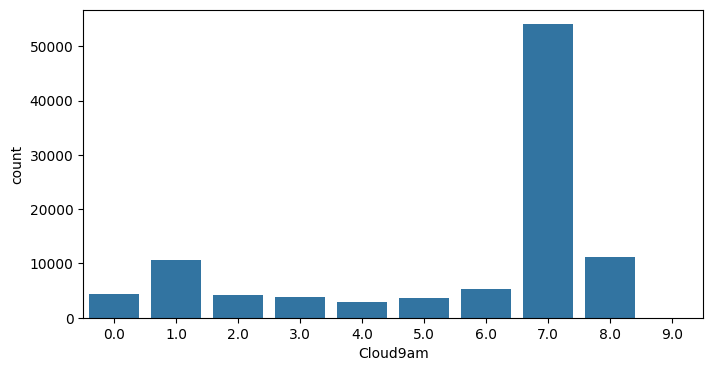

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="Cloud9am", data=dataset)
plt.show()

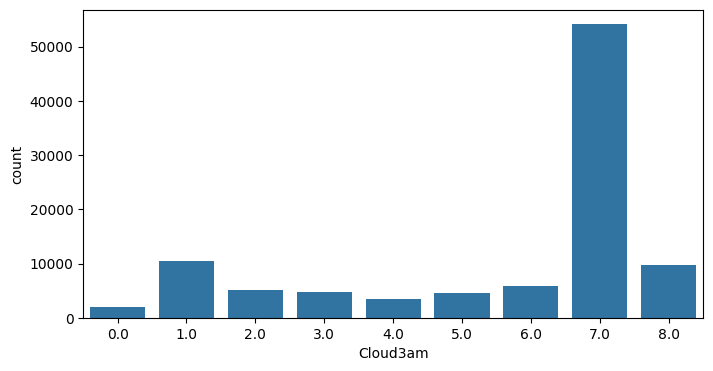

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="Cloud3am", data=dataset)
plt.show()

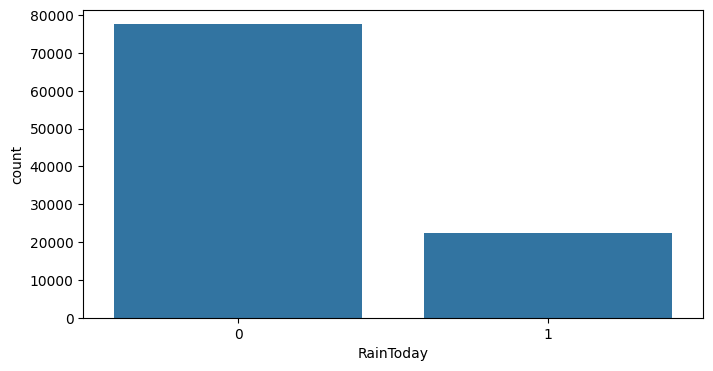

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="RainToday", data=dataset)
plt.show()

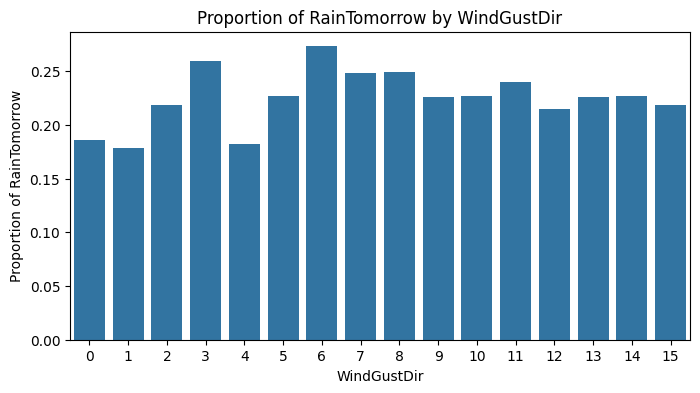

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="WindGustDir", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindGustDir")
plt.xlabel("WindGustDir")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

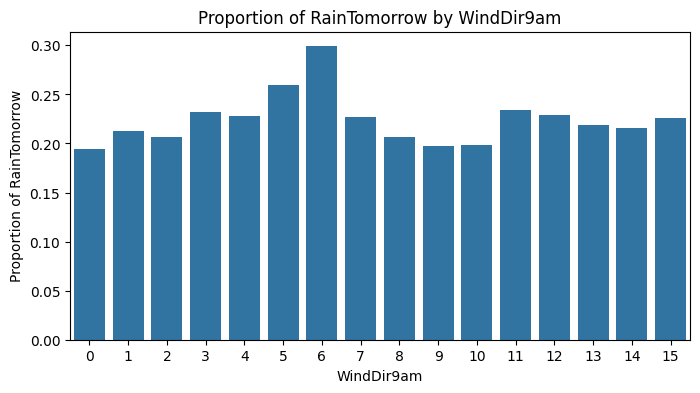

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="WindDir9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindDir9am")
plt.xlabel("WindDir9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

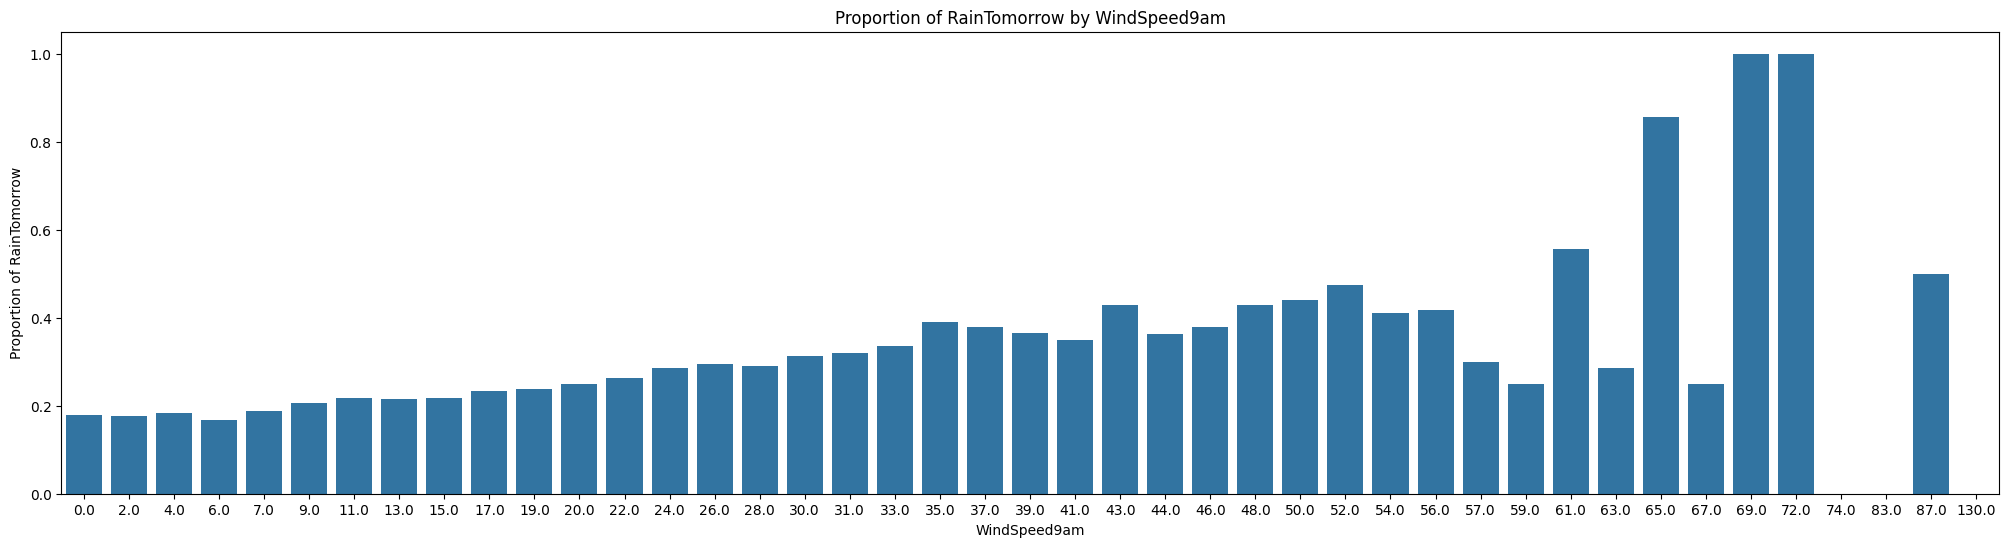

In [ ]:
plt.figure(figsize=(25, 6))
sns.barplot(x="WindSpeed9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindSpeed9am")
plt.xlabel("WindSpeed9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

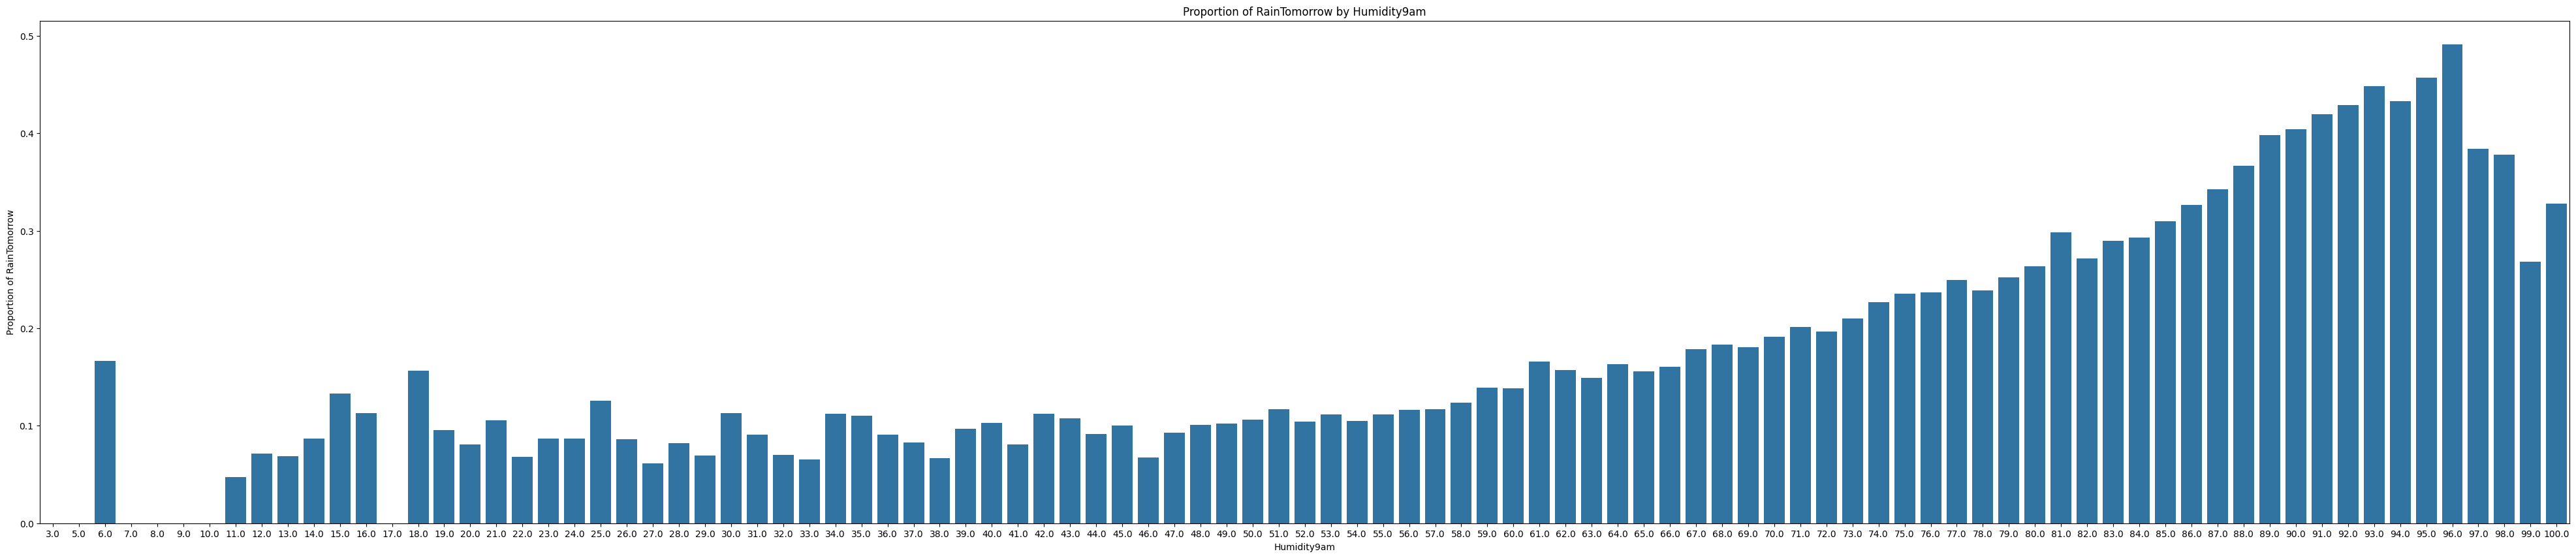

In [ ]:
plt.figure(figsize=(50, 10))
sns.barplot(x="Humidity9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by Humidity9am")
plt.xlabel("Humidity9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

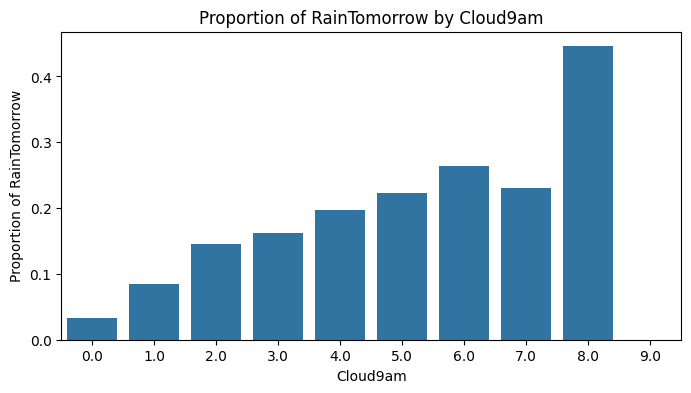

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Cloud9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by Cloud9am")
plt.xlabel("Cloud9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

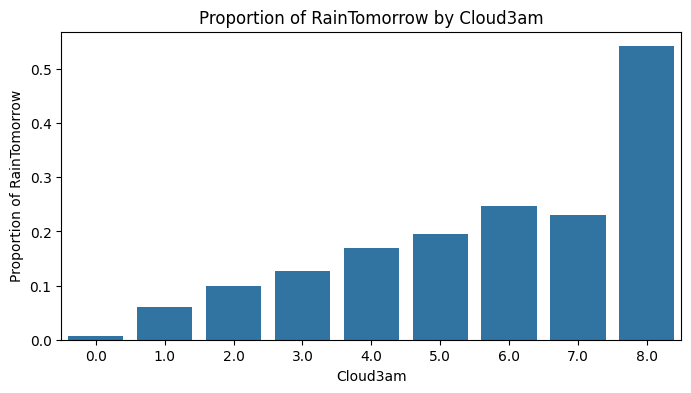

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Cloud3am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by Cloud3am")
plt.xlabel("Cloud3am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

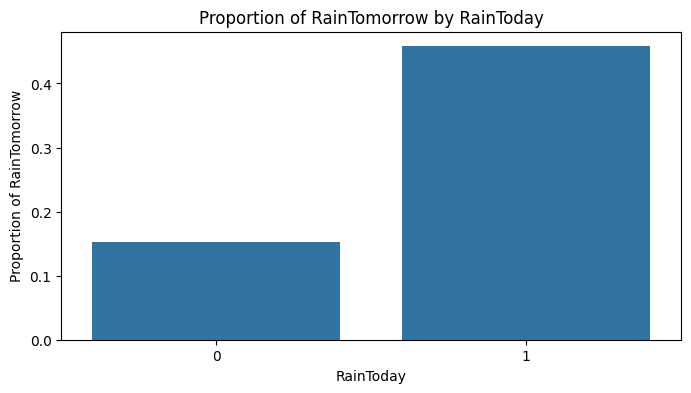

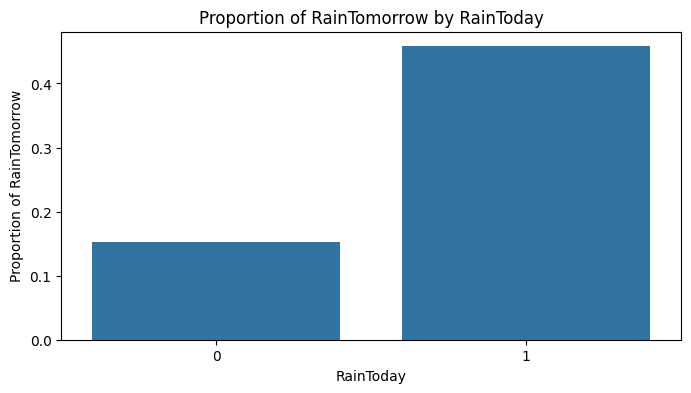

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="RainToday", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by RainToday")
plt.xlabel("RainToday")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

IMPLEMENTING DESCISION TREE ALGORITHM WITH PYTHON PACKAGE

---




In [ ]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

decision_tree = DecisionTreeClassifier()

In [ ]:
dt=decision_tree.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))
print('Classification Report:\n', classification_report(y_test,y_pred,digits=5))

Accuracy: 0.7784683074384711
Classification Report:
               precision    recall  f1-score   support

           0    0.86013   0.85479   0.85746     28346
           1    0.49774   0.50867   0.50315      8019

    accuracy                        0.77847     36365
   macro avg    0.67894   0.68173   0.68030     36365
weighted avg    0.78022   0.77847   0.77933     36365



In [ ]:
import unittest
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

class TestDecisionTreeModel(unittest.TestCase):

    def setUp(self):
        # Assuming X_train, X_test, y_train, y_test are already defined and normalized
        # dt is your trained DecisionTreeClassifier model
        self.dt = DecisionTreeClassifier()
        self.dt.fit(X_train, y_train)
        self.y_train_pred = self.dt.predict(X_train)
        self.y_test_pred = self.dt.predict(X_test)

    def test_model_accuracy(self):
        train_accuracy = accuracy_score(y_train, self.y_train_pred)
        test_accuracy = accuracy_score(y_test, self.y_test_pred)
        self.assertGreaterEqual(test_accuracy, 0.7, "Test accuracy should be at least 70%")
        self.assertGreaterEqual(train_accuracy, 0.7, "Train accuracy should be at least 70%")

    def test_classification_report(self):
        test_report = classification_report(y_test, self.y_test_pred, output_dict=True)
        train_report = classification_report(y_train, self.y_train_pred, output_dict=True)
        self.assertIn('0', test_report, "Class 0 should be in the test classification report")
        self.assertIn('1', test_report, "Class 1 should be in the test classification report")
        self.assertIn('accuracy', test_report, "Test accuracy should be in the classification report")
        self.assertIn('0', train_report, "Class 0 should be in the train classification report")
        self.assertIn('1', train_report, "Class 1 should be in the train classification report")
        self.assertIn('accuracy', train_report, "Train accuracy should be in the classification report")

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 135.563s

OK


IMPLEMENTING DESCISION TREE ALGORITHM WITHOUT PYTHON PACKAGE


In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = float(threshold)
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

def main():
    # Train the Decision Tree model from scratch
    dt = DecisionTree(max_depth=5)
    dt.fit(X_train, y_train)

    # Evaluate the model's performance
    accuracy, report = evaluate_model(dt, X_test, y_test)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

if __name__ == "__main__":
    main()


Accuracy: 0.8358861542692149
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     28346
           1       0.71      0.44      0.54      8019

    accuracy                           0.84     36365
   macro avg       0.78      0.69      0.72     36365
weighted avg       0.82      0.84      0.82     36365



In [ ]:
import unittest
import numpy as np

class TestDecisionTree(unittest.TestCase):
    def setUp(self):
        # Sample dataset
        self.X_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        self.y_train = np.array([0, 1, 0])
        self.X_test = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        self.y_test = np.array([0, 1, 0])

    def test_fit(self):
        dt = DecisionTree()
        dt.fit(self.X_train, self.y_train)
        self.assertIsNotNone(dt.tree)

    def test_predict(self):
        dt = DecisionTree()
        dt.fit(self.X_train, self.y_train)
        y_pred = dt.predict(self.X_test)
        self.assertEqual(len(y_pred), len(self.y_test))

    def test_traverse_tree(self):
        node = Node(value=1)
        self.assertTrue(node.is_leaf_node())

    def test_best_criteria(self):
        dt = DecisionTree()
        X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        y = np.array([0, 1, 0])
        feat_idxs = [0, 1, 2]
        best_feat, best_thresh = dt._best_criteria(X, y, feat_idxs)
        self.assertIsInstance(best_feat, int)
        self.assertIsInstance(best_thresh, float)

    def test_entropy(self):
        dt = DecisionTree()
        y = np.array([0, 1, 0, 1, 0, 1])
        entropy = dt._entropy(y)
        self.assertAlmostEqual(entropy, 1.0, places=5)

    def test_most_common_label(self):
        dt = DecisionTree()
        y = np.array([0, 1, 0, 1, 0, 1, 1, 1])
        most_common_label = dt._most_common_label(y)
        self.assertEqual(most_common_label, 1)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)



..........
----------------------------------------------------------------------
Ran 10 tests in 4.197s

OK
